In [403]:
from keras import layers
import tensorflow as tf
import pandas as pd
import numpy as np

# Make numpy values easier to read.
np.set_printoptions(precision=3, suppress=True)


df = pd.read_csv('../../csv_dateien/starcraftFinalcsvs/allRunsButOnlyTerran.csv')

conditions = [
    (df['fraction'] == "Protoss"), #1
    (df['fraction'] == "Terraner"), #2
    (df['fraction'] == "Zerg"), #3
    (df['fraction'] == "T"), #2
]

values = [1, 2, 3, 2]

df["fraction"] = np.select(conditions, values)
df=df[df["total_army"]>0]
df=df[df["fraction"]==2]
df=df[df["supply"]<=200]
# df["ratio"] = df["total_workers"]/df["total_army"]
# df = df[df["ratio"] < 4]

dfPrepSample = df.drop(columns=["player","winner","replay_filename", "Unnamed: 0", "total_army_value","fraction"])
len(dfPrepSample)
dfPrepSample

,total_workers,resource_mining,total_army,supply,time
1,46,28154,96.0,174.0,836
6,66,40998,120.0,196.0,934
15,54,13965,45.0,117.0,583
19,35,9595,26.0,62.0,449
24,52,38030,98.0,165.0,1102
...,...,...,...,...,...
5888,41,7364,17.0,69.0,381
5889,61,25845,80.0,173.0,878
5893,70,26351,70.0,157.0,795
5894,70,24263,76.0,165.0,754


13

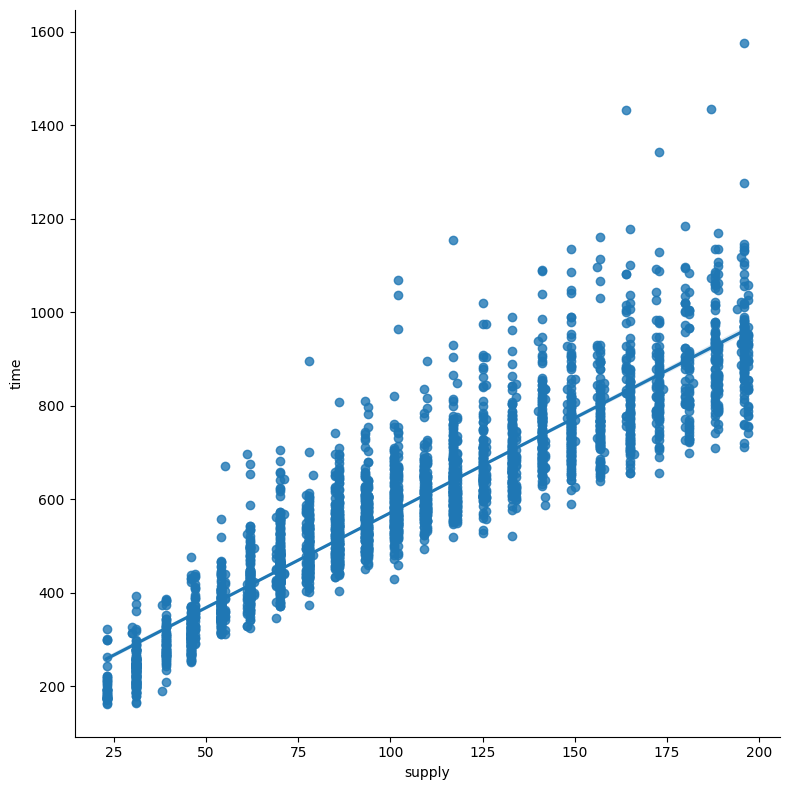

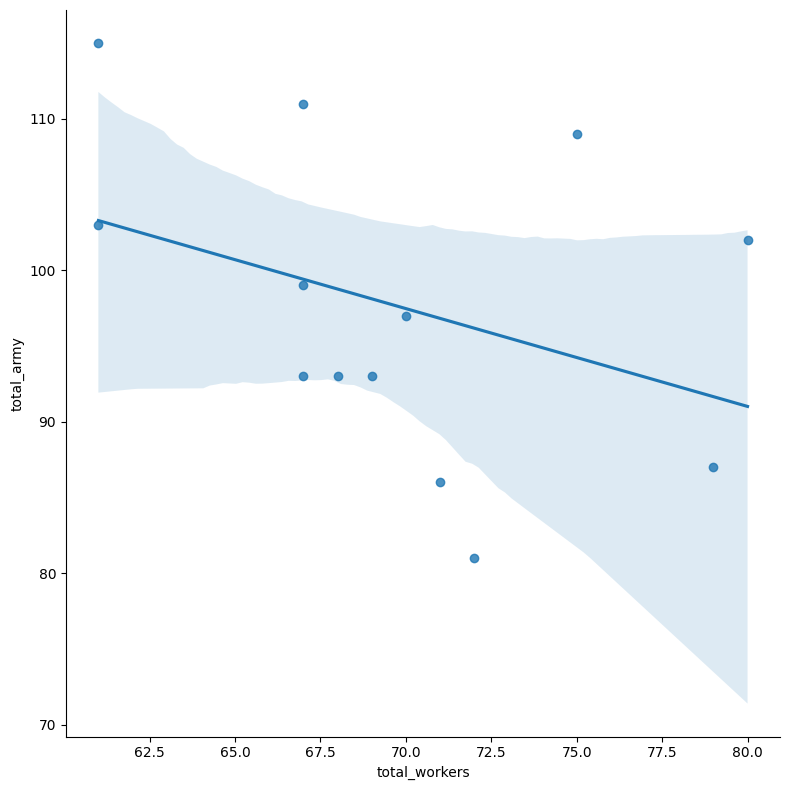

In [404]:
import seaborn as sns
g3= sns.lmplot(x="supply", y="time", order=1, data=dfPrepSample,
          height=8)
"""
g3= sns.lmplot(x="ratio", y="time", order=1, data=dfPrepSample,
          height=8)
"""
# df2 = dfPrepSample[dfPrepSample["resource_mining"] < 50000]
# dfPrepSample = dfPrepSample[dfPrepSample["ratio"]<2.5]
# dfPrepSample = dfPrepSample[dfPrepSample["time"]>450]
# dfPrepSample = dfPrepSample[dfPrepSample["time"]<600]
dfPrepSample = dfPrepSample[dfPrepSample["supply"]>195]
# dfPrepSample = dfPrepSample[dfPrepSample["time"]<800]
g3= sns.lmplot(x="total_workers", y="total_army", order=1, data=dfPrepSample,
          height=8)
"""
g3= sns.lmplot(x="total_workers", y="ratio", order=1, data=dfPrepSample,
          height=8)
"""
len(dfPrepSample)

In [405]:
dfPrepSample = dfPrepSample.drop(columns=["supply", "time"])
dfPrepSample

,total_workers,resource_mining,total_army
3034,71,43403,86.0
3419,68,22187,93.0
3792,67,29646,111.0
3851,61,26920,115.0
3927,70,24471,97.0
3984,69,26715,93.0
4076,67,30381,99.0
4630,72,25100,81.0
4810,75,34466,109.0
5236,79,23353,87.0


In [406]:

dfPrepSample.to_csv("prepSample.csv", header=["total_workers","total_army", "resource_mining"])

In [407]:
df_sample = dfPrepSample.sample(frac=1, random_state=12)
dfTrainSample = df_sample.sample(frac=0.8)

dfTrainSample.head()

,total_workers,resource_mining,total_army
3984,69,26715,93.0
5699,61,23777,103.0
3851,61,26920,115.0
3419,68,22187,93.0
3792,67,29646,111.0


In [408]:
dfTestSample = df_sample.drop(dfTrainSample.index)

dfTestSample.head()

,total_workers,resource_mining,total_army
5438,80,25253,102.0
3034,71,43403,86.0
4076,67,30381,99.0


In [409]:
dfTrainFeatures = dfTrainSample.copy()
dfTrainFeatures

,total_workers,resource_mining,total_army
3984,69,26715,93.0
5699,61,23777,103.0
3851,61,26920,115.0
3419,68,22187,93.0
3792,67,29646,111.0
5728,67,19441,93.0
4630,72,25100,81.0
5236,79,23353,87.0
3927,70,24471,97.0
4810,75,34466,109.0


In [410]:

dfTrainLabels = dfTrainFeatures.pop("total_army")
dfTrainFeatures = np.array(dfTrainFeatures)
dfTrainFeatures

array([[   69, 26715],
       [   61, 23777],
       [   61, 26920],
       [   68, 22187],
       [   67, 29646],
       [   67, 19441],
       [   72, 25100],
       [   79, 23353],
       [   70, 24471],
       [   75, 34466]], dtype=int64)

In [411]:
# normalize = layers.Normalization()
# normalize.adapt(dfTrainFeatures)

In [412]:
sc_model = tf.keras.Sequential([layers.Dense(30, activation="relu"),layers.Dense(20, activation="relu"),layers.Dense(1)]) # letzte lösung 30/5

sc_model.compile(loss = tf.keras.losses.MeanSquaredError(),
                      optimizer = tf.keras.optimizers.Adam())

In [413]:
sc_model.fit(dfTrainFeatures, dfTrainLabels, epochs=8000)  #350

Epoch 1/8000
1/1 [==============================] - 1s 540ms/step - loss: 3823283.2500
Epoch 2/8000
1/1 [==============================] - 0s 2ms/step - loss: 2819948.5000
Epoch 3/8000
1/1 [==============================] - 0s 3ms/step - loss: 1976326.3750
Epoch 4/8000
1/1 [==============================] - 0s 2ms/step - loss: 1292112.7500
Epoch 5/8000
1/1 [==============================] - 0s 2ms/step - loss: 764131.2500
Epoch 6/8000
1/1 [==============================] - 0s 2ms/step - loss: 389531.8125
Epoch 7/8000
1/1 [==============================] - 0s 3ms/step - loss: 155598.3438
Epoch 8/8000
1/1 [==============================] - 0s 2ms/step - loss: 32435.2441
Epoch 9/8000
1/1 [==============================] - 0s 2ms/step - loss: 420.7349
Epoch 10/8000
1/1 [==============================] - 0s 2ms/step - loss: 31460.7930
Epoch 11/8000
1/1 [==============================] - 0s 2ms/step - loss: 85421.6641
Epoch 12/8000
1/1 [==============================] - 0s 2ms/step - loss: 1

In [414]:
sc_model.summary()


Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_97 (Dense)            (None, 30)                90        
                                                                 
 dense_98 (Dense)            (None, 20)                620       
                                                                 
 dense_99 (Dense)            (None, 1)                 21        
                                                                 
Total params: 731
Trainable params: 731
Non-trainable params: 0
_________________________________________________________________


In [415]:
dfTestFeatures = dfTestSample.copy()

dfTestLabels = dfTestFeatures.pop("total_army")
dfTestFeatures = np.array(dfTestFeatures)
dfTestLabels.head()

5438    102.0
3034     86.0
4076     99.0
Name: total_army, dtype: float64

In [416]:
from sklearn.metrics import r2_score


predictedValues = sc_model.predict(dfTestFeatures)
r2_score_sc = (r2_score(dfTestLabels, predictedValues))
stri = ""
if(r2_score_sc<0):
    stri = "negative" + str(r2_score_sc)
else:
    stri = str(r2_score_sc)

print(f"The R^2 value in the test set is {stri}")

1/1 [==============================] - 0s 108ms/step
The R^2 value in the test set is negative-15.641787738230803


In [417]:
sc_model.save('sc_ts_model.h5')
